# Student Development Initiative

**HACKTIV8 X IBM Program Student Development Intiative (SDI)**

Capstone Project

In [1]:
print("Bismillah Top 20 Capstone Project")

Bismillah Top 20 Capstone Project


## Test

In [2]:
print("Bismillah Lancarrr")

Bismillah Lancarrr


In [3]:
print(9+8)

17


## Installing Library

In [4]:
!pip install langchain_community
!pip install pandas
!pip install replicate
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00


In [5]:
!pip install pandas

## Importing Library

In [32]:
# Import library for data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import wordcloud

In [33]:
from langchain_community.llms import Replicate
from google.colab import userdata
import pandas
import os

# Ambil token dari colab
api_token = userdata.get("api_token")

# Masukin token ke environment variable
os.environ["REPLICATE_API_TOKEN"] = api_token

## Data Ingestion

### Load Data

In [9]:
# Load data
file_path = '/content/drive/MyDrive/Documents/Tapskuy/H8/Kelas/IBM/Student Development Initiate/Capstone Project/industrial_fault_detection_data_1000.csv'
df = pd.read_csv(file_path)

In [10]:
# Show the data
df

,Timestamp,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label
0,2023-03-10 00:00:00,0.437086,64.810634,7.785117,0.601657,90.561384,1
1,2023-03-10 00:01:00,0.955643,93.352076,7.740936,0.601657,90.561384,1
2,2023-03-10 00:02:00,0.758795,119.835667,9.718764,0.601657,90.561384,0
3,2023-03-10 00:03:00,0.638793,108.577991,7.748639,0.601657,90.561384,1
4,2023-03-10 00:04:00,0.240417,114.524892,7.815849,0.601657,90.561384,0
...,...,...,...,...,...,...,...
995,2023-03-10 16:35:00,0.182424,102.556413,9.595887,0.601657,90.561384,0
996,2023-03-10 16:36:00,0.925582,126.529170,7.471820,0.601657,90.561384,0
997,2023-03-10 16:37:00,0.223137,55.516641,7.929364,0.601657,90.561384,0
998,2023-03-10 16:38:00,0.955214,54.564378,7.870137,0.601657,90.561384,0


## Data Preparation

### Data Understanding

In [11]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1000 non-null   object 
 1   Vibration (mm/s)  1000 non-null   float64
 2   Temperature (°C)  1000 non-null   float64
 3   Pressure (bar)    1000 non-null   float64
 4   RMS Vibration     1000 non-null   float64
 5   Mean Temp         1000 non-null   float64
 6   Fault Label       1000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [12]:
# Check for missing values
df.isnull().sum()

,0
Timestamp,0
Vibration (mm/s),0
Temperature (°C),0
Pressure (bar),0
RMS Vibration,0
Mean Temp,0
Fault Label,0


In [13]:
# Check for duplicate data
df.duplicated().sum()

np.int64(0)

In [14]:
# Data description
df.describe()

,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,0.541231,90.561384,8.507217,6.016565e-01,9.056138e+01,0.479000
std,0.262924,23.375191,0.872023,1.110779e-14,7.108983e-13,0.652675
min,0.104169,50.257461,7.000035,6.016565e-01,9.056138e+01,0.000000
25%,0.312376,69.285942,7.784053,6.016565e-01,9.056138e+01,0.000000
50%,0.547127,91.498713,8.501842,6.016565e-01,9.056138e+01,0.000000
75%,0.769888,110.837205,9.277311,6.016565e-01,9.056138e+01,1.000000
max,0.999746,129.953098,9.993463,6.016565e-01,9.056138e+01,2.000000


### Data Preprocessing

In [15]:
# Convert Timestamp into datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         1000 non-null   datetime64[ns]
 1   Vibration (mm/s)  1000 non-null   float64       
 2   Temperature (°C)  1000 non-null   float64       
 3   Pressure (bar)    1000 non-null   float64       
 4   RMS Vibration     1000 non-null   float64       
 5   Mean Temp         1000 non-null   float64       
 6   Fault Label       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.8 KB


In [17]:
df.head()

,Timestamp,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label
0,2023-03-10 00:00:00,0.437086,64.810634,7.785117,0.601657,90.561384,1
1,2023-03-10 00:01:00,0.955643,93.352076,7.740936,0.601657,90.561384,1
2,2023-03-10 00:02:00,0.758795,119.835667,9.718764,0.601657,90.561384,0
3,2023-03-10 00:03:00,0.638793,108.577991,7.748639,0.601657,90.561384,1
4,2023-03-10 00:04:00,0.240417,114.524892,7.815849,0.601657,90.561384,0


### EDA

/tmp/ipython-input-18-2094561477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fault Label', palette='Set2')


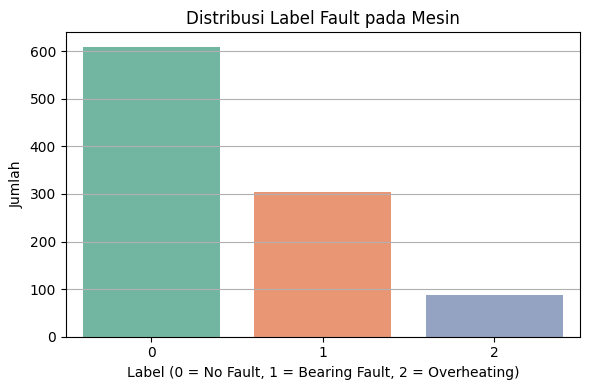

In [ ]:
# Check the distribution of fault label
label_counts = df['Fault Label'].value_counts()

# Plot the fault distribution (1 = Fault, 0 = Normal)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Fault Label', palette='Set2')
plt.title('Distribusi Label Fault pada Mesin')
plt.xlabel('Label (0 = No Fault, 1 = Bearing Fault, 2 = Overheating)')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
label_counts

,count
Fault Label,
0,609
1,303
2,88


/tmp/ipython-input-20-292735823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fault Label', palette='Set2')


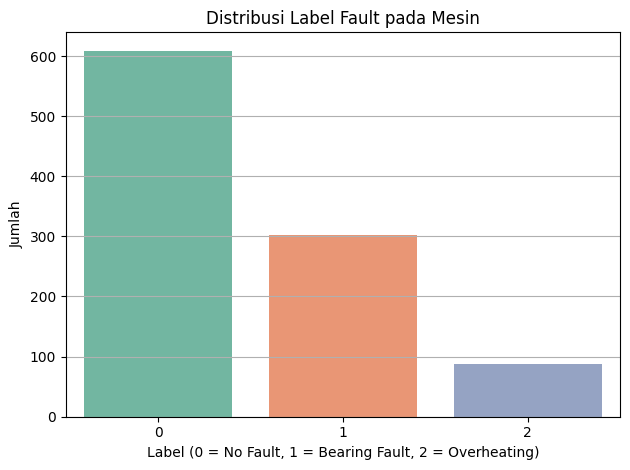

In [ ]:
# Visualization of labels distribution (0 = No Fault, 1 = Bearing Fault, 2 = Overheating)
sns.countplot(data=df, x='Fault Label', palette='Set2')
plt.title('Distribusi Label Fault pada Mesin')
plt.xlabel('Label (0 = No Fault, 1 = Bearing Fault, 2 = Overheating)')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


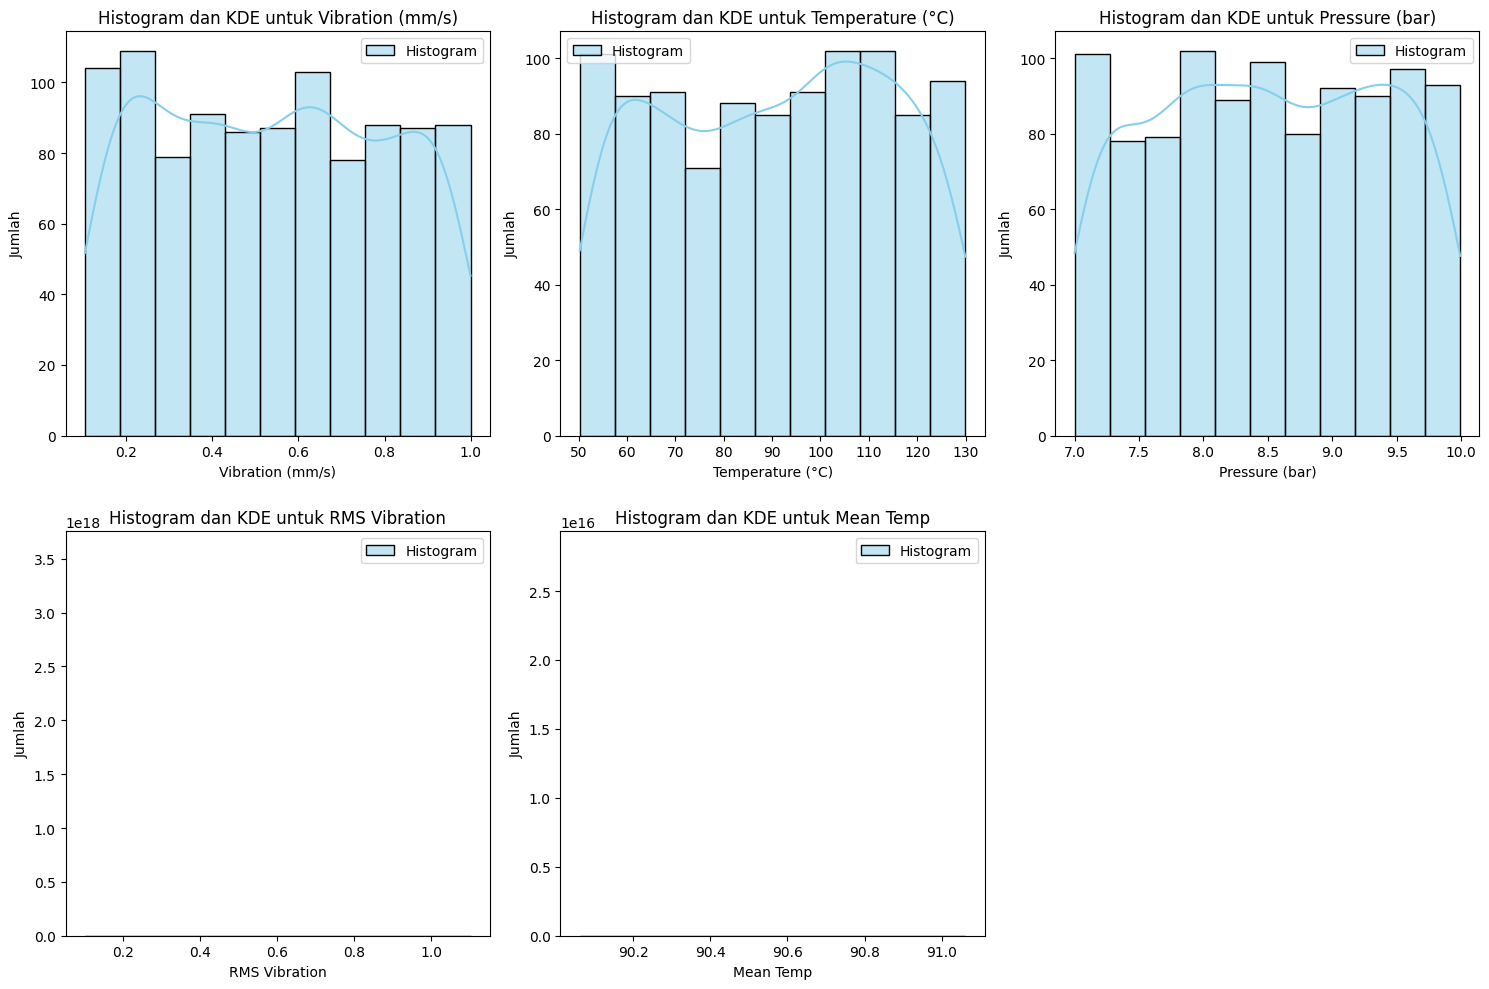

In [ ]:
# Plot distribution histogram and kde for all features
parameters = df.drop(columns=['Timestamp', 'Fault Label'])

# Determine the number of rows and columns for subplots
n_params = len(parameters.columns)
n_cols = 3
n_rows = (n_params + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size based on number of rows

for i, parameter in enumerate(parameters.columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.histplot(data=df, x=parameter, kde=True, color='skyblue', label='Histogram')
  plt.title(f'Histogram dan KDE untuk {parameter}')
  plt.xlabel(parameter)
  plt.ylabel('Jumlah')
  plt.legend()

plt.tight_layout()
plt.show()

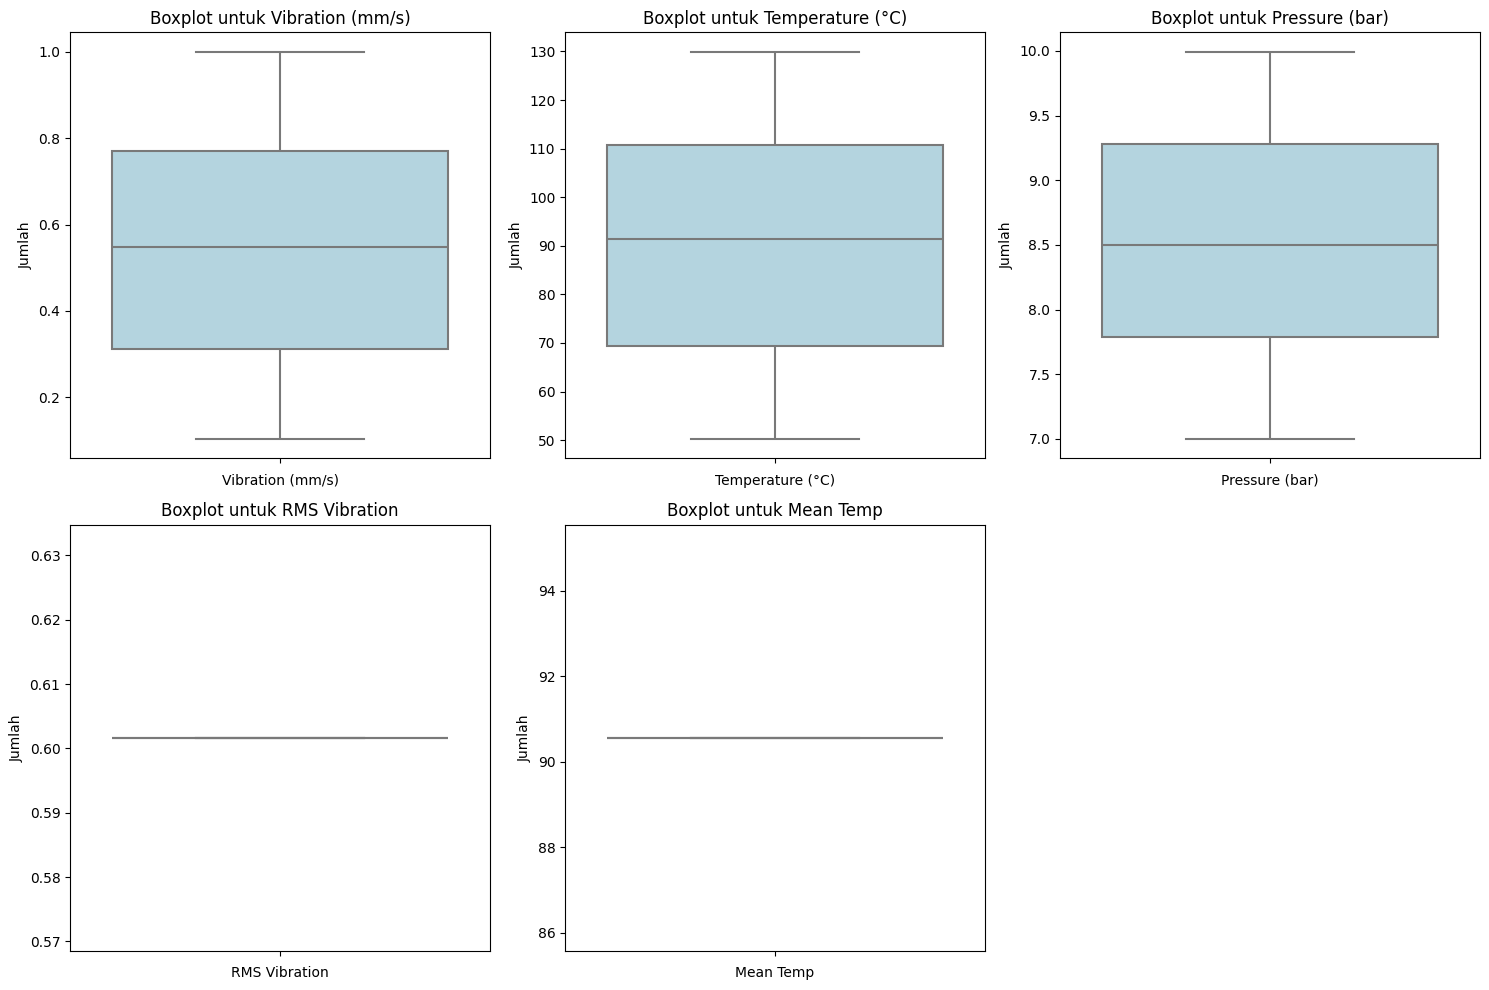

In [ ]:
# Plot distribution using boxplot for all features in a 2x3 subplot
parameters = df.drop(columns=['Timestamp', 'Fault Label'])

# Determine the number of rows and columns for subplots
n_params = len(parameters.columns)
n_cols = 3
n_rows = (n_params + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size based on number of rows

for i, parameter in enumerate(parameters.columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.boxplot(data=df, y=parameter, orient='v', color='lightblue', linewidth=1.5) # Changed x to y for vertical boxplot
  plt.title(f'Boxplot untuk {parameter}')
  plt.xlabel(parameter)
  plt.ylabel('Jumlah')
  # plt.legend() # Removed legend as it's not applicable for individual boxplots

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


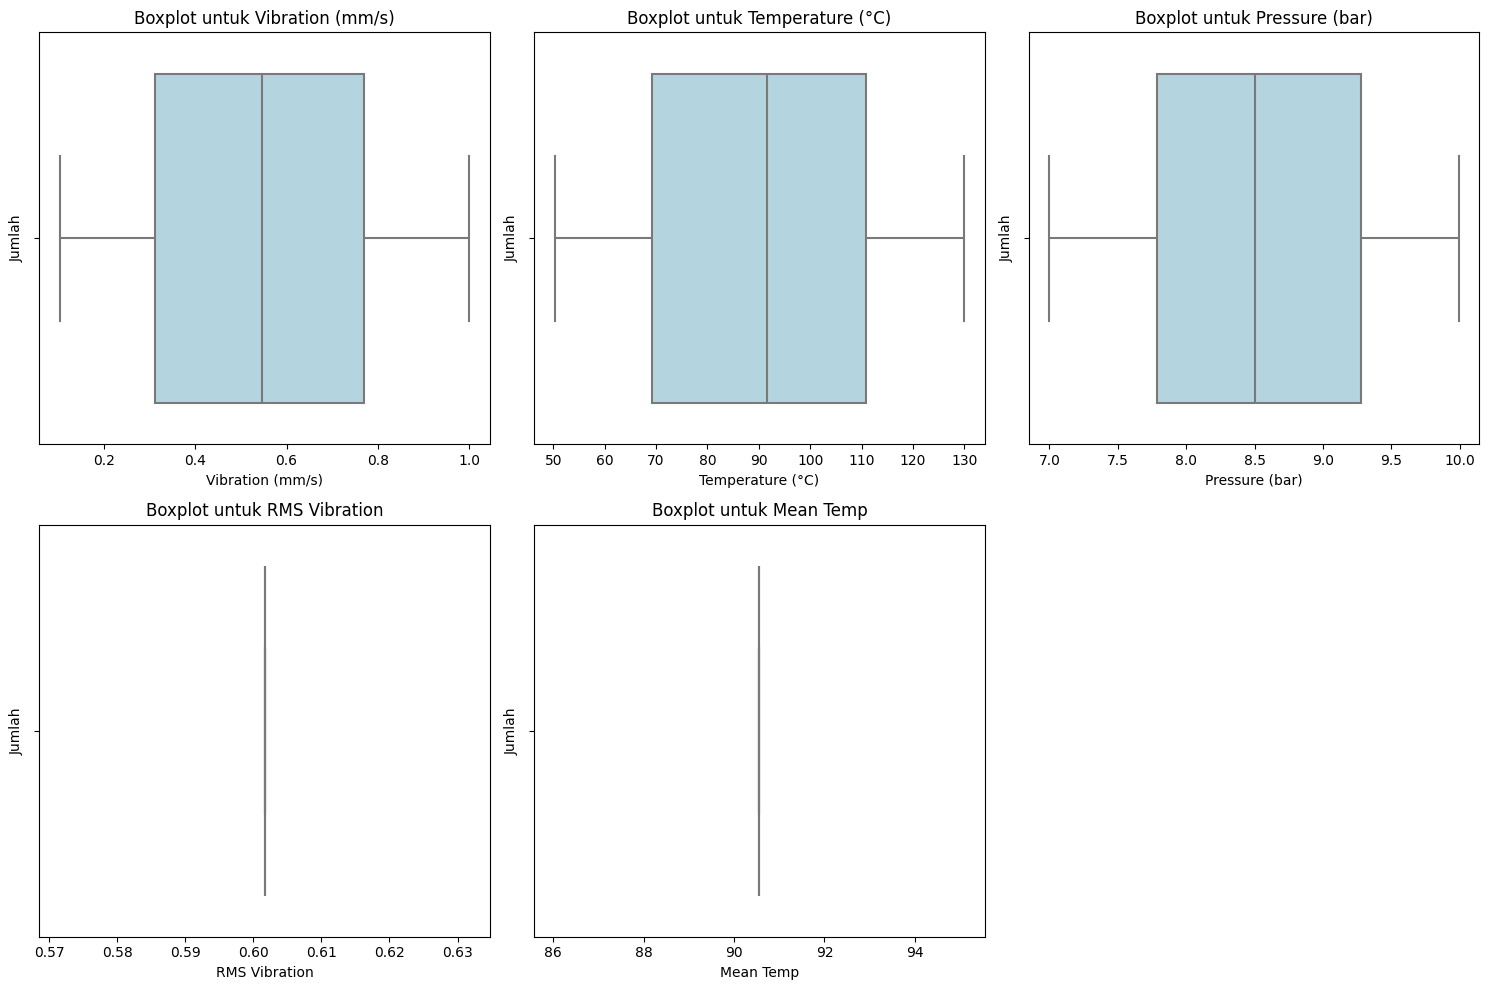

In [ ]:
# Plot distribution using boxplot for all features
parameters = df.drop(columns=['Timestamp', 'Fault Label'])

# Determine the number of rows and columns for subplots
n_params = len(parameters.columns)
n_cols = 3
n_rows = (n_params + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size based on number of rows

for i, parameter in enumerate(parameters.columns):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.boxplot(data=df, x=parameter, orient='v', color='lightblue', linewidth=1.5)
  plt.title(f'Boxplot untuk {parameter}')
  plt.xlabel(parameter)
  plt.ylabel('Jumlah')
  # plt.legend() # Removed legend as it's not applicable for individual boxplots

plt.tight_layout()
plt.show()

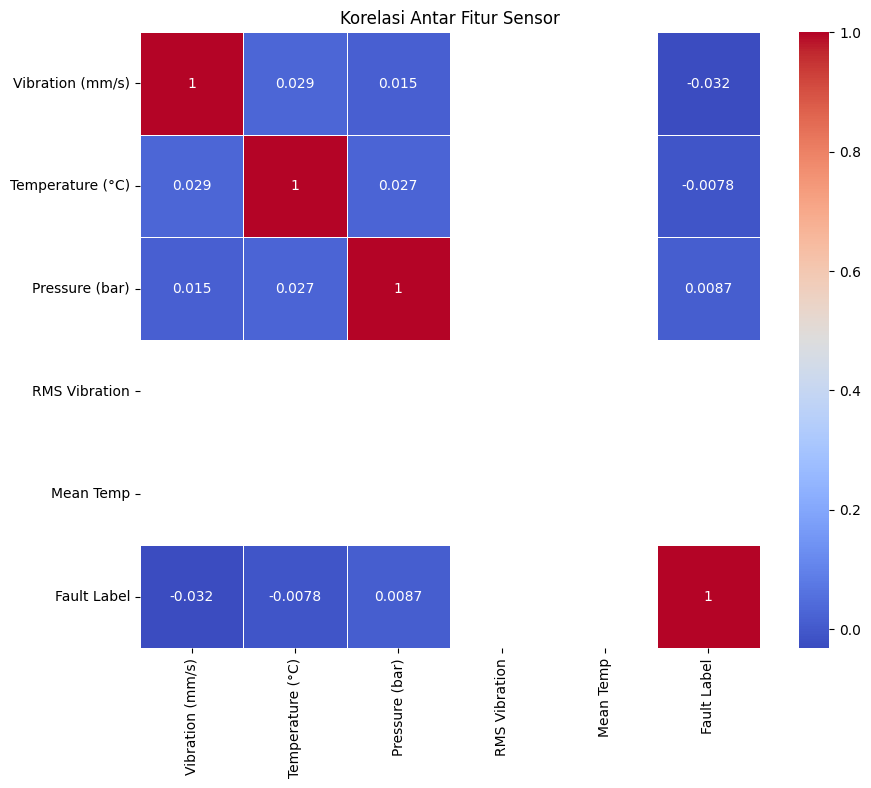

In [ ]:
# Correlation matrix
correlation_matrix = df.drop(columns=['Timestamp']).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur Sensor')
plt.show()

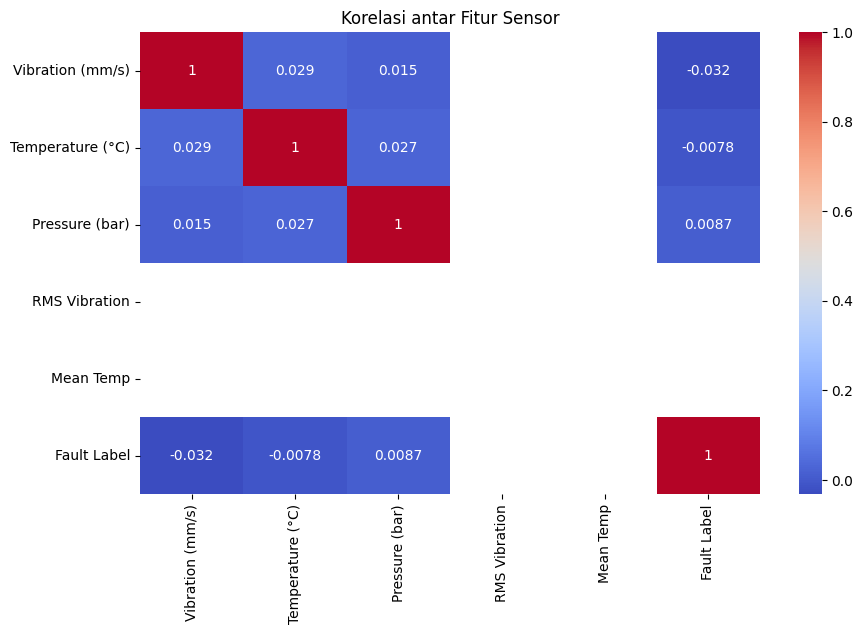

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Timestamp']).corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Sensor")
plt.show()


### Feature Engineering

In [27]:
df_test = df.copy()

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         1000 non-null   datetime64[ns]
 1   Vibration (mm/s)  1000 non-null   float64       
 2   Temperature (°C)  1000 non-null   float64       
 3   Pressure (bar)    1000 non-null   float64       
 4   RMS Vibration     1000 non-null   float64       
 5   Mean Temp         1000 non-null   float64       
 6   Fault Label       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.8 KB


In [ ]:
# Create 1-hour time bins for shift reports
df_test['Shift Start'] = df_test['Timestamp'].dt.floor('1H')
df_test['Shift End'] = df_test['Shift Start'] + pd.Timedelta(hours=1)


/tmp/ipython-input-93-4062178939.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_test['Shift Start'] = df_test['Timestamp'].dt.floor('1H')


In [ ]:
# Check the dataframe
df_test.head()

,Timestamp,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label,Shift Start,Shift End
0,2023-03-10 00:00:00,0.437086,64.810634,7.785117,0.601657,90.561384,1,2023-03-10,2023-03-10 01:00:00
1,2023-03-10 00:01:00,0.955643,93.352076,7.740936,0.601657,90.561384,1,2023-03-10,2023-03-10 01:00:00
2,2023-03-10 00:02:00,0.758795,119.835667,9.718764,0.601657,90.561384,0,2023-03-10,2023-03-10 01:00:00
3,2023-03-10 00:03:00,0.638793,108.577991,7.748639,0.601657,90.561384,1,2023-03-10,2023-03-10 01:00:00
4,2023-03-10 00:04:00,0.240417,114.524892,7.815849,0.601657,90.561384,0,2023-03-10,2023-03-10 01:00:00


In [ ]:
# Group by each hour and calculate aggregate metrics
agg_df_test = df_test.groupby('Shift Start').agg({
    'Temperature (°C)': ['min', 'max', 'mean', 'std'],
    'Pressure (bar)': ['mean', 'std'],
    'Vibration (mm/s)': ['max', 'mean', 'std'],
    'RMS Vibration': 'mean'
}).reset_index()

# Flatten columns
agg_df_test.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in agg_df_test.columns]
agg_df_test.rename(columns={'Shift Start': 'Shift Start'}, inplace=True)

In [ ]:
# Check the agg_df_test dataframe
agg_df_test.head()

,Shift Start,Temperature (°C) min,Temperature (°C) max,Temperature (°C) mean,Temperature (°C) std,Pressure (bar) mean,Pressure (bar) std,Vibration (mm/s) max,Vibration (mm/s) mean,Vibration (mm/s) std,RMS Vibration mean
0,2023-03-10 00:00:00,51.701553,129.834729,94.876021,24.726496,8.444229,0.875956,0.972919,0.520751,0.274887,0.601657
1,2023-03-10 01:00:00,51.429915,129.592626,90.034358,24.976562,8.564712,0.897691,0.988198,0.538047,0.263057,0.601657
2,2023-03-10 02:00:00,50.510870,128.494894,95.356973,22.082421,8.586748,0.813627,0.987085,0.515913,0.259690,0.601657
3,2023-03-10 03:00:00,51.769884,129.769960,90.986029,24.980551,8.536456,0.919643,0.975709,0.554326,0.258424,0.601657
4,2023-03-10 04:00:00,50.781668,128.933007,85.361879,22.952775,8.401888,0.847817,0.991048,0.599384,0.268421,0.601657


In [ ]:
agg_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shift Start            17 non-null     datetime64[ns]
 1   Temperature (°C) min   17 non-null     float64       
 2   Temperature (°C) max   17 non-null     float64       
 3   Temperature (°C) mean  17 non-null     float64       
 4   Temperature (°C) std   17 non-null     float64       
 5   Pressure (bar) mean    17 non-null     float64       
 6   Pressure (bar) std     17 non-null     float64       
 7   Vibration (mm/s) max   17 non-null     float64       
 8   Vibration (mm/s) mean  17 non-null     float64       
 9   Vibration (mm/s) std   17 non-null     float64       
 10  RMS Vibration mean     17 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.6 KB


### Prompt Engineering

In [ ]:
# Helper: format float
def fmt(val, decimals=2):
  return f"{val:.{decimals}f}"


In [ ]:
# Build prompt for each shift row
def build_shift_prompt(row):
  return f"""
You are an expert industrial automation analyst.
You have the data below is came from Industrial IoT for Predictive Maintenance in Automation contains 1000 entries of sensor data, collected from machinery in an industrial automation environment.
The dataset includes three key sensor measurements: vibration (in mm/s), temperature (in °C), and pressure (in bar), which are crucial for monitoring the health of industrial equipment.
The data also includes two derived features: RMS vibration and mean temperature, which help in the classification of potential faults.

Generate a detailed but concise shift report using the following sensor data:

Shift Period: {row['Shift Start'].strftime('%H:%M')}–{(row['Shift Start'] + pd.Timedelta(hours=1)).strftime('%H:%M')}

Sensor Summary:
- Temperature ranged from {fmt(row['Temperature (°C) min'], 2)}°C to {fmt(row['Temperature (°C) max'], 2)}°C
- Average temperature: {fmt(row['Temperature (°C) mean'])}°C, std dev: {fmt(row['Temperature (°C) std'])}
- Pressure averaged {fmt(row['Pressure (bar) mean'])} bar (std: {fmt(row['Pressure (bar) std'])})
- Vibration peaked at {fmt(row['Vibration (mm/s) max'], 2)} mm/s, average {fmt(row['Vibration (mm/s) mean'], 2)} mm/s
- RMS Vibration: {fmt(row['RMS Vibration mean'], 2)}

Output:
Write the following:
1. Shift Report (3 bullet points: one for Temperature, one for Pressure and one for Vibration)
2. Important Information (1-2 sentences): use words like warning, anomaly, recommend or suggest maintenance, or notable insight based on the sensor data summary. (end naturally)
Use professional tone and clear language.
"""


In [ ]:
# Apply to agg_df dataframe
agg_df_test['prompt'] = agg_df_test.apply(build_shift_prompt, axis=1)

In [ ]:
# Check the agg_df dataframe
agg_df_test.head()

,Shift Start,Temperature (°C) min,Temperature (°C) max,Temperature (°C) mean,Temperature (°C) std,Pressure (bar) mean,Pressure (bar) std,Vibration (mm/s) max,Vibration (mm/s) mean,Vibration (mm/s) std,RMS Vibration mean,prompt
0,2023-03-10 00:00:00,51.701553,129.834729,94.876021,24.726496,8.444229,0.875956,0.972919,0.520751,0.274887,0.601657,\nYou are an expert industrial automation anal...
1,2023-03-10 01:00:00,51.429915,129.592626,90.034358,24.976562,8.564712,0.897691,0.988198,0.538047,0.263057,0.601657,\nYou are an expert industrial automation anal...
2,2023-03-10 02:00:00,50.510870,128.494894,95.356973,22.082421,8.586748,0.813627,0.987085,0.515913,0.259690,0.601657,\nYou are an expert industrial automation anal...
3,2023-03-10 03:00:00,51.769884,129.769960,90.986029,24.980551,8.536456,0.919643,0.975709,0.554326,0.258424,0.601657,\nYou are an expert industrial automation anal...
4,2023-03-10 04:00:00,50.781668,128.933007,85.361879,22.952775,8.401888,0.847817,0.991048,0.599384,0.268421,0.601657,\nYou are an expert industrial automation anal...


In [ ]:
# Check one of the prompt
print(agg_df_test.loc[0, 'prompt'])


You are an expert industrial automation analyst.
You have the data below is came from Industrial IoT for Predictive Maintenance in Automation contains 1000 entries of sensor data, collected from machinery in an industrial automation environment.
The dataset includes three key sensor measurements: vibration (in mm/s), temperature (in °C), and pressure (in bar), which are crucial for monitoring the health of industrial equipment.
The data also includes two derived features: RMS vibration and mean temperature, which help in the classification of potential faults.

Generate a detailed but concise shift report using the following sensor data:

Shift Period: 00:00–01:00

Sensor Summary:
- Temperature ranged from 51.70°C to 129.83°C
- Average temperature: 94.88°C, std dev: 24.73
- Pressure averaged 8.44 bar (std: 0.88)
- Vibration peaked at 0.97 mm/s, average 0.52 mm/s
- RMS Vibration: 0.60

Output:
Write the following:
1. Shift Report (3 bullet points: one for Temperature, one for Pressure 

## Summarization Process

In [ ]:
# Check the dataframe
agg_df_test.head()

,Shift Start,Temperature (°C) min,Temperature (°C) max,Temperature (°C) mean,Temperature (°C) std,Pressure (bar) mean,Pressure (bar) std,Vibration (mm/s) max,Vibration (mm/s) mean,Vibration (mm/s) std,RMS Vibration mean,prompt
0,2023-03-10 00:00:00,51.701553,129.834729,94.876021,24.726496,8.444229,0.875956,0.972919,0.520751,0.274887,0.601657,\nYou are an expert industrial automation anal...
1,2023-03-10 01:00:00,51.429915,129.592626,90.034358,24.976562,8.564712,0.897691,0.988198,0.538047,0.263057,0.601657,\nYou are an expert industrial automation anal...
2,2023-03-10 02:00:00,50.510870,128.494894,95.356973,22.082421,8.586748,0.813627,0.987085,0.515913,0.259690,0.601657,\nYou are an expert industrial automation anal...
3,2023-03-10 03:00:00,51.769884,129.769960,90.986029,24.980551,8.536456,0.919643,0.975709,0.554326,0.258424,0.601657,\nYou are an expert industrial automation anal...
4,2023-03-10 04:00:00,50.781668,128.933007,85.361879,22.952775,8.401888,0.847817,0.991048,0.599384,0.268421,0.601657,\nYou are an expert industrial automation anal...


### Setup the LLM Model (IBM Granite)

In [ ]:
# Params tuned for summarization
replicate_params = {
  "temperature": 0.6,
  "top_p": 0.9,
  "top_k": 20,
  "max_tokens": 400,
  # "stop_sequences": ",".join(["\n\n", "\n3."]) # Joined the list into a single string
  "repetition_penalty": 1.0,
  "random_seed": 42
}

# Init LLM
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  model_kwargs=replicate_params # Changed 'input' to 'model_kwargs' based on previous warning
)


### Run The Summarization

In [ ]:
# Store output in list
report_list = []

# Generate summaries
for i, row in agg_df_test.iterrows():
  print(f"Generating report for shift: {row['Shift Start']}")
  summary = llm.invoke(row['prompt'])
  report_list.append({
    'Shift Start': row['Shift Start'],
    'Shift End': row['Shift Start'] + pd.Timedelta(hours=1),
    'Summary': summary
  })

# Combine to dataframe
report_df = pd.DataFrame(report_list)


Generating report for shift: 2023-03-10 00:00:00
Generating report for shift: 2023-03-10 01:00:00
Generating report for shift: 2023-03-10 02:00:00
Generating report for shift: 2023-03-10 03:00:00
Generating report for shift: 2023-03-10 04:00:00
Generating report for shift: 2023-03-10 05:00:00
Generating report for shift: 2023-03-10 06:00:00
Generating report for shift: 2023-03-10 07:00:00
Generating report for shift: 2023-03-10 08:00:00
Generating report for shift: 2023-03-10 09:00:00
Generating report for shift: 2023-03-10 10:00:00
Generating report for shift: 2023-03-10 11:00:00
Generating report for shift: 2023-03-10 12:00:00
Generating report for shift: 2023-03-10 13:00:00
Generating report for shift: 2023-03-10 14:00:00
Generating report for shift: 2023-03-10 15:00:00
Generating report for shift: 2023-03-10 16:00:00


### Save, Display and Review The Reports

In [ ]:
# Save to CSV
report_df.to_csv("Shift_Report_AI_Summary.csv", index=False)


In [ ]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Shift Start  17 non-null     datetime64[ns]
 1   Shift End    17 non-null     datetime64[ns]
 2   Summary      17 non-null     object        
dtypes: datetime64[ns](2), object(1)
memory usage: 540.0+ bytes


In [ ]:
# Print 2 example reports
for i, row in report_df.head(2).iterrows():
  print()
  print(f"📋 Shift Report: {row['Shift Start'].strftime('%H:%M')}–{row['Shift End'].strftime('%H:%M')}")
  print(row['Summary'])
  print("-" * 100)
  print()



📋 Shift Report: 00:00–01:00
1. Shift Report:
   - Temperature: During the shift, temperatures fluctuated between 51.70°C and 129.83°C, with an average of 94.88°C and a standard deviation of 24.73°C. This indicates significant variability, potentially due to operational changes or external factors.
   - Pressure: The average pressure maintained at 8.44 bar, with a standard deviation of 0.88 bar, suggesting consistent operational conditions within the expected range.
   - Vibration: The highest recorded vibration level was 0.97 mm/s, while the average was 0.52 mm/s. The Root Mean Square (RMS) vibration averaged at 0.60 mm/s, which falls within the normal operational range but warrants continuous monitoring.

2. Important Information: The temperature data exhibits considerable variability, which may require further investigation to identify potential causes, such as process changes or equipment malfunctions. Although vibration levels remain within the typical range, the relatively high R

In [ ]:
# Print all reports
for i, row in report_df.iterrows():
  print()
  print(f"📋 Shift Report: {row['Shift Start'].strftime('%H:%M')}–{row['Shift End'].strftime('%H:%M')}")
  print(row['Summary'])
  print("-" * 100)
  print()



📋 Shift Report: 00:00–01:00
1. Shift Report:
   - Temperature: During the shift, temperatures fluctuated between 51.70°C and 129.83°C, with an average of 94.88°C and a standard deviation of 24.73°C. This indicates significant variability, potentially due to operational changes or external factors.
   - Pressure: The average pressure maintained at 8.44 bar, with a standard deviation of 0.88 bar, suggesting consistent operational conditions within the expected range.
   - Vibration: The highest recorded vibration level was 0.97 mm/s, while the average was 0.52 mm/s. The Root Mean Square (RMS) vibration averaged at 0.60 mm/s, which falls within the normal operational range but warrants continuous monitoring.

2. Important Information: The temperature data exhibits considerable variability, which may require further investigation to identify potential causes, such as process changes or equipment malfunctions. Although vibration levels remain within the typical range, the relatively high R

## LLM Evaluation

### Evaluation

In [18]:
# Load the summary file
df_summary = pd.read_csv('/content/Shift_Report_AI_Summary.csv')
df_summary['Shift Start'] = pd.to_datetime(df_summary['Shift Start'])
df_summary['Shift End'] = pd.to_datetime(df_summary['Shift End'])

# Preview
df_summary.head()

,Shift Start,Shift End,Summary
0,2023-03-10 00:00:00,2023-03-10 01:00:00,1. Shift Report:\n - Temperature: During the...
1,2023-03-10 01:00:00,2023-03-10 02:00:00,1. Shift Report:\n - Temperature: Throughout...
2,2023-03-10 02:00:00,2023-03-10 03:00:00,1. Shift Report:\n - Temperature: During the...
3,2023-03-10 03:00:00,2023-03-10 04:00:00,1. Shift Report:\n - Temperature: The temper...
4,2023-03-10 04:00:00,2023-03-10 05:00:00,1. Shift Report:\n - Temperature: During the...


In [19]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Shift Start  17 non-null     datetime64[ns]
 1   Shift End    17 non-null     datetime64[ns]
 2   Summary      17 non-null     object        
dtypes: datetime64[ns](2), object(1)
memory usage: 540.0+ bytes


In [20]:
# Flag common insights
df_summary['Has Warning'] = df_summary['Summary'].str.contains('warning', case=False, na=False)
df_summary['Has Recommendation'] = df_summary['Summary'].str.contains('recommend|suggest', case=False, na=False)
df_summary['Has Anomaly'] = df_summary['Summary'].str.contains('anomaly|fluctuation|irregular|spike', case=False, na=False)

# Count
insight_counts = {
    "Warnings": df_summary['Has Warning'].sum(),
    "Recommendations": df_summary['Has Recommendation'].sum(),
    "Anomalies": df_summary['Has Anomaly'].sum()
}

print(insight_counts)


{'Warnings': np.int64(0), 'Recommendations': np.int64(17), 'Anomalies': np.int64(14)}


In [21]:
# Insight summary
total_shifts = len(df_summary)
insight_summary = f"""
📊 Evaluasi Insight LLM Granite

- Total Shift yang dianalisis: {total_shifts}
- Shift mengandung *Warning*     : {insight_counts['Warnings']}
- Shift mengandung *Recommendation* : {insight_counts['Recommendations']}
- Shift mengandung *Anomaly*    : {insight_counts['Anomalies']}

📈 Visualisasi menunjukkan waktu-waktu krusial di mana insight penting muncul,
dan bisa digunakan oleh tim maintenance untuk penjadwalan preventif.
"""

print(insight_summary)



📊 Evaluasi Insight LLM Granite

- Total Shift yang dianalisis: 17
- Shift mengandung *Warning*     : 0
- Shift mengandung *Recommendation* : 17
- Shift mengandung *Anomaly*    : 14

📈 Visualisasi menunjukkan waktu-waktu krusial di mana insight penting muncul,
dan bisa digunakan oleh tim maintenance untuk penjadwalan preventif.



### Visualization

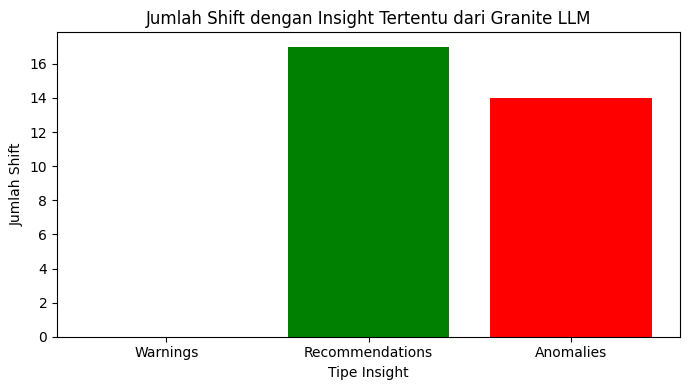

In [23]:
# Bar chart status insight
plt.figure(figsize=(7,4))
plt.bar(insight_counts.keys(), insight_counts.values(), color=['orange', 'green', 'red'])
plt.title("Jumlah Shift dengan Insight Tertentu dari Granite LLM")
plt.ylabel("Jumlah Shift")
plt.xlabel("Tipe Insight")
plt.tight_layout()
plt.savefig("LLM_Insight_BarChart.png")  # For submit
plt.show()


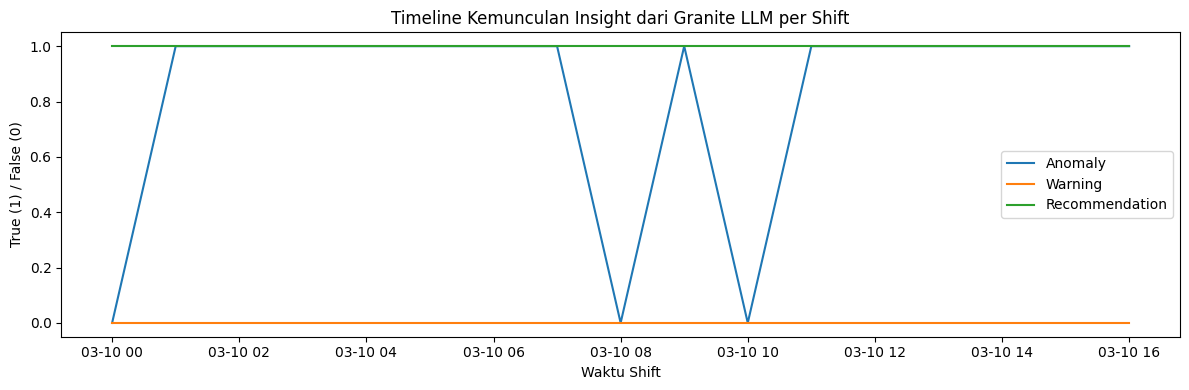

In [24]:
# Timeline insight highlight
plt.figure(figsize=(12,4))
sns.lineplot(x=df_summary['Shift Start'], y=df_summary['Has Anomaly'], label='Anomaly')
sns.lineplot(x=df_summary['Shift Start'], y=df_summary['Has Warning'], label='Warning')
sns.lineplot(x=df_summary['Shift Start'], y=df_summary['Has Recommendation'], label='Recommendation')
plt.title("Timeline Kemunculan Insight dari Granite LLM per Shift")
plt.ylabel("True (1) / False (0)")
plt.xlabel("Waktu Shift")
plt.legend()
plt.tight_layout()
plt.savefig("LLM_Insight_Timeline.png")  # For submit
plt.show()

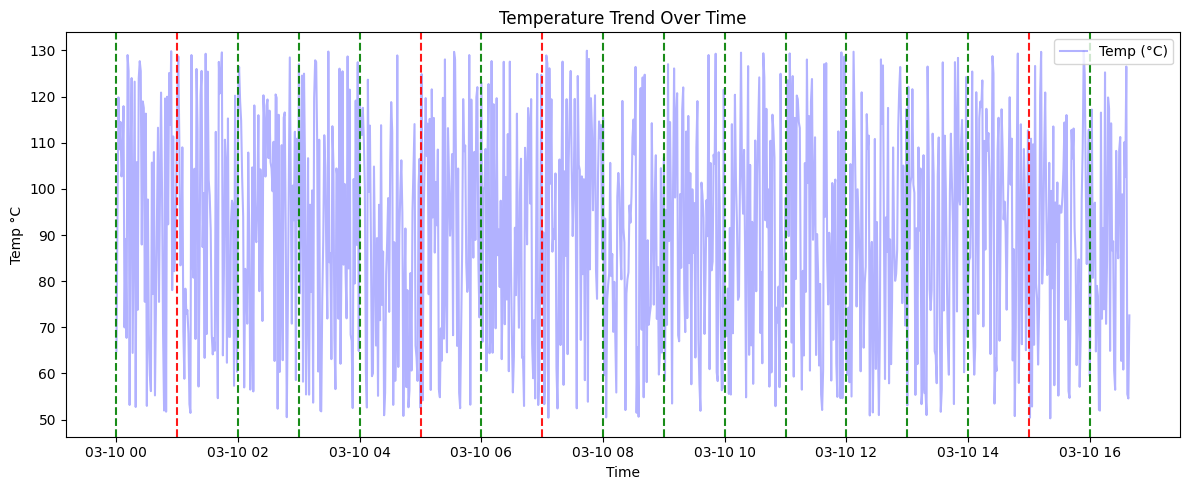

In [30]:
# Plot temperature trend and overlay important insight times
plt.figure(figsize=(12, 5))
plt.plot(df_test['Timestamp'], df_test['Temperature (°C)'], color='blue', alpha=0.3, label='Temp (°C)')
plt.title('Temperature Trend Over Time')

# Mark shifts where AI summary contains key term
for i, row in df_summary.iterrows():
  if 'anomaly' in row['Summary'].lower() or 'anomalies' in row['Summary'].lower():
    plt.axvline(row['Shift Start'], color='red', linestyle='--', alpha=0.9)
  elif 'recommend' in row['Summary'].lower() or 'suggest' in row['Summary'].lower():
    plt.axvline(row['Shift Start'], color='green', linestyle='--', alpha=0.9)

plt.xlabel("Time")
plt.ylabel("Temp °C")
plt.legend()
plt.tight_layout()
plt.show()


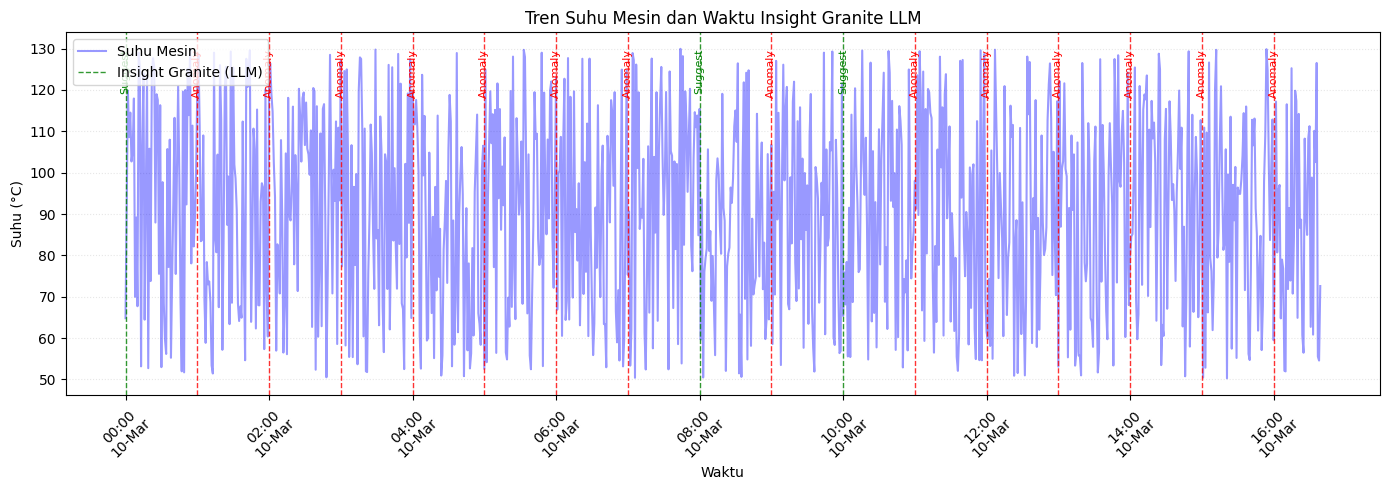

In [31]:
# Buat figure
plt.figure(figsize=(14, 5))

# Plot temperatur aktual
plt.plot(df_test['Timestamp'], df_test['Temperature (°C)'], color='blue', alpha=0.4, label='Suhu Mesin (°C)')

# Tambahkan garis vertikal untuk shift yang mengandung insight penting
for i, row in df_summary.iterrows():
    shift_time = row['Shift Start']
    summary = row['Summary'].lower()

    # Anomali
    if 'anomaly' in summary or 'anomalies' in summary or 'fluctuation' in summary or 'irregular' in summary:
        plt.axvline(shift_time, color='red', linestyle='--', alpha=0.8, linewidth=1)
        plt.text(shift_time, df_test['Temperature (°C)'].max(), 'Anomaly', color='red', fontsize=8, rotation=90, va='top', ha='center')

    # Rekomendasi / Saran
    elif 'recommend' in summary or 'suggest' in summary:
        plt.axvline(shift_time, color='green', linestyle='--', alpha=0.8, linewidth=1)
        plt.text(shift_time, df_test['Temperature (°C)'].max(), 'Suggest', color='green', fontsize=8, rotation=90, va='top', ha='center')

# Format sumbu X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d-%b'))
plt.xticks(rotation=45)

# Label dan legend
plt.title("Tren Suhu Mesin dan Waktu Insight Granite LLM")
plt.xlabel("Waktu")
plt.ylabel("Suhu (°C)")
plt.legend(["Suhu Mesin", "Insight Granite (LLM)"], loc="upper left")

# Finishing
plt.tight_layout()
plt.grid(True, linestyle=':', alpha=0.3)
plt.savefig("LLM_Temperature_Overlay.png")  # Untuk disubmit atau slide
plt.show()
